In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
file_path = r'D:\python\ML\1\housePrice.csv'

house_data = pd.read_csv(file_path)

house_data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [6]:
house_data.info()

house_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [8]:
# Remove rows with missing addresses
cleaned_data = house_data.dropna(subset=['Address']).copy()

# Remove commas and convert 'Area' to numeric using .loc
cleaned_data.loc[:, 'Area'] = cleaned_data['Area'].str.replace(',', '').str.strip().astype(float)

# Remove outliers (Area > 500)
cleaned_data = cleaned_data[cleaned_data['Area'] <= 500]

In [9]:
# Check the structure of the cleaned dataset
cleaned_data.info()

# Display the first few rows of the cleaned dataset
cleaned_data.head()

# Display summary statistics for numeric columns
cleaned_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3433 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3433 non-null   object 
 1   Room        3433 non-null   int64  
 2   Parking     3433 non-null   bool   
 3   Warehouse   3433 non-null   bool   
 4   Elevator    3433 non-null   bool   
 5   Address     3433 non-null   object 
 6   Price       3433 non-null   float64
 7   Price(USD)  3433 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 171.0+ KB


,Room,Price,Price(USD)
count,3433.000000,3.433000e+03,3.433000e+03
mean,2.074279,5.212296e+09,1.737432e+05
std,0.748359,7.404752e+09,2.468251e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.400000e+09,4.666667e+04
50%,2.000000,2.850000e+09,9.500000e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


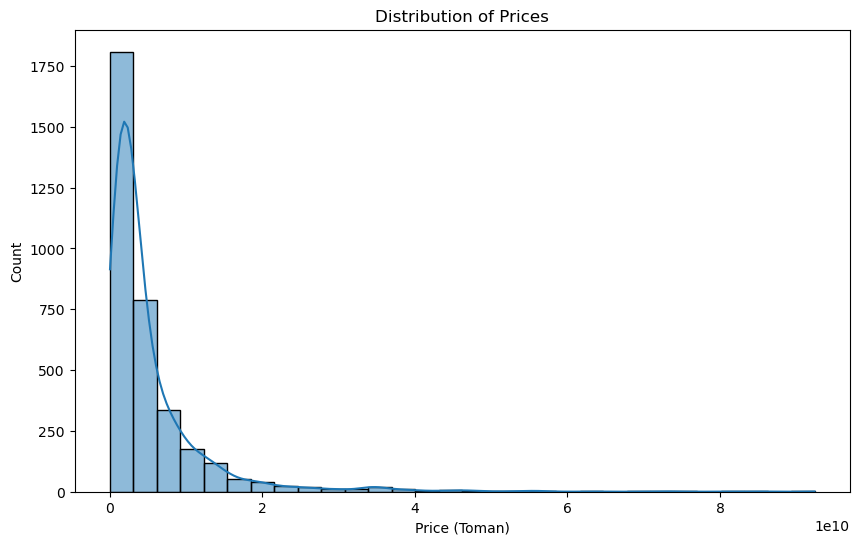

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Price'], kde=True, bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price (Toman)')
plt.show()

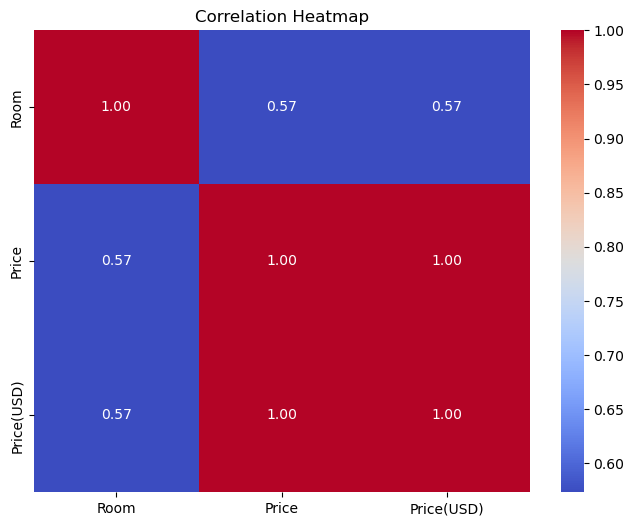

In [12]:
# Calculate correlations for numeric columns only
numeric_data = cleaned_data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

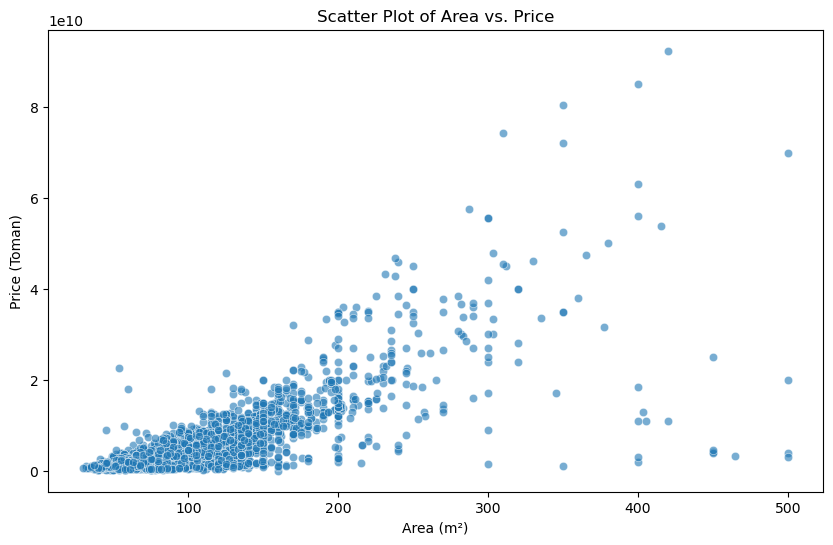

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['Area'], y=cleaned_data['Price'], alpha=0.6)
plt.title('Scatter Plot of Area vs. Price')
plt.xlabel('Area (m²)')
plt.ylabel('Price (Toman)')
plt.show()

In [14]:
# Select features (X) and target (y)
X = cleaned_data[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']].copy()
y = cleaned_data['Price']

# Encode boolean features into integers (True -> 1, False -> 0)
X['Parking'] = X['Parking'].astype(int)
X['Warehouse'] = X['Warehouse'].astype(int)
X['Elevator'] = X['Elevator'].astype(int)

# Verify the features and target
print(X.head())  # Display the first few rows of features
print(y.head())  # Display the first few rows of the target

    Area  Room  Parking  Warehouse  Elevator
0   63.0     1        1          1         1
1   60.0     1        1          1         1
2   79.0     2        1          1         1
3   95.0     2        1          1         1
4  123.0     2        1          1         1
0    1.850000e+09
1    1.850000e+09
2    5.500000e+08
3    9.025000e+08
4    7.000000e+09
Name: Price, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (2746, 5)
Testing Features Shape: (687, 5)
Training Target Shape: (2746,)
Testing Target Shape: (687,)


In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.04819331e+08 -2.94426879e+08 -3.18975285e+08  1.46856304e+09
  8.78778118e+08]
Intercept: -6839481711.892448


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2332912384.400449
Mean Squared Error (MSE): 1.7535073013063463e+19
R-squared (R²): 0.6139597979089895


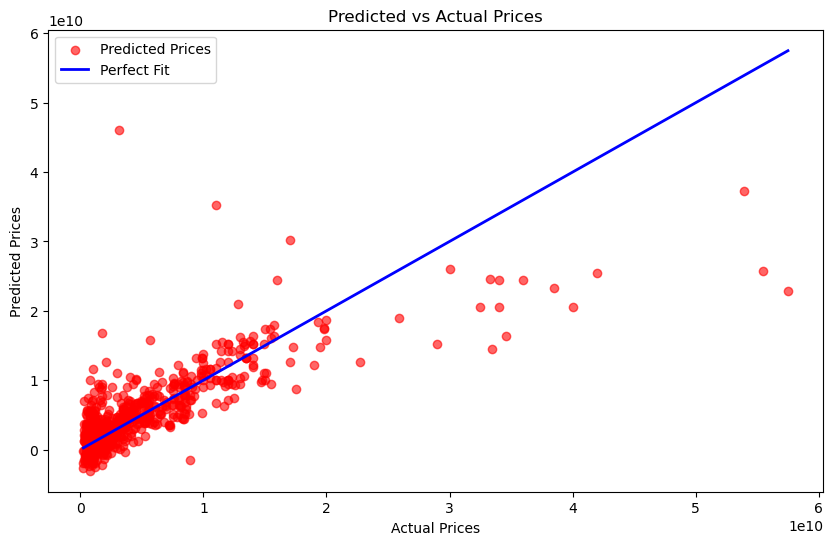

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='red', label='Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2, label='Perfect Fit')
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

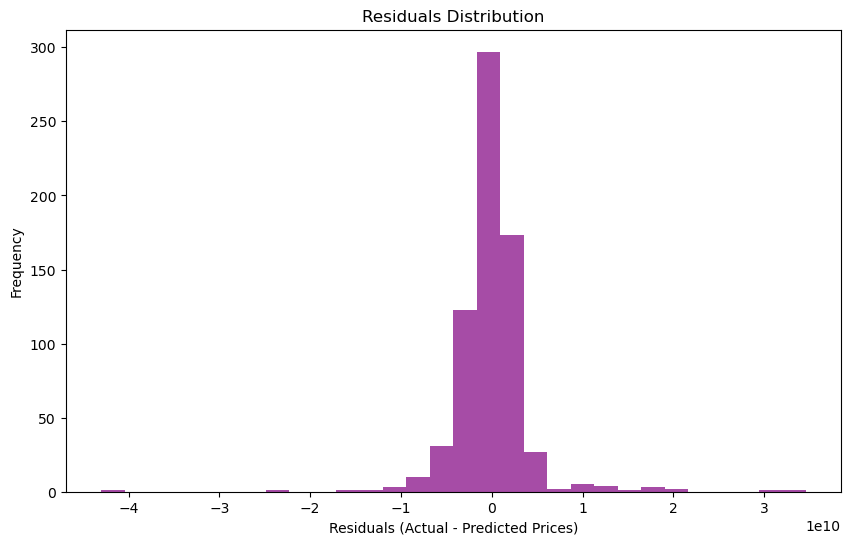

In [19]:
# Residuals (errors)
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals (Actual - Predicted Prices)")
plt.ylabel("Frequency")
plt.show()